# What is a Neural Network and How does it work?

<h3>What is a Neural Network?</h3>
<p style="font-size:13pt;line-height:19pt">
A neural network constists of 3 main layers: Input layer, Hidden layer, and the Output layer. In order to get how it works, we need to go through a recap about how the Perceptron works.
</p>

<h3>How does the Perceptron work?</h3>
<p style="font-size:13pt;line-height:19pt">
Perceptron is an algorithm to "learn" the binary classifier, which is composed of a "linear combination" of an input vector $X$ and a weight vector $W$, and usually a bias vector $b$ is added.<br>
A weight vector controls the impact of the input vector(especially elements of it) and a bias vector controls how easily a neuron is activated.<br>
To be noted, a bias vector can be understood as a result of the linear combination between an input vector and a weight vector, where a scalar '1' is in the input vector and another scalar 'b' is in the weight vector.<br>
The perceptron requires the output value to be discrete since it is used for (binary) classification, while it cannot be guaranteed that the result of the linear combination is always discrete.<br>
Thus, we need another function to make the linear combination value discrete, namely an 'Activation function'.
</p>

<h3>What is an 'Activation function'?</h3>
<p style="font-size:13pt;line-height:19pt">
An activation function is a function which transforms a given value into an output value. The given value here is a 'transformed' input value with its weight and bias.<br>
</p>
<p>
There are various kinds of an activation function. The perceptron uses a function called 'Threshold function' as its activation function, which is generally called 'Step function'.<br>
A step function is a function that restricts the output value in the possible range, according to a criterion called 'threshold', where the function returns a specific value if the given input is larger than the threshold, and returns another specific value otherwise. Here are some well-known examples of a step function.
</p>

<h4>1. Sigmoid Function</h4>
<p style="font-size:13pt;line-height:19pt">Sigmoid function restricts the output in the open interval $(0, 1)$. The function looks like $h(x)=\frac{1}{1+\exp (-x)}$. As $x$ gets close to $\infty$, the $\exp (-x)$ part goes to $0$, making the entire function converge to $1$. As $x$ goes to $-\infty$, however, the $\exp(-x)$ part diverges to $\infty$, the entire function converges to $0$. Furthermore, if $x=0$, since the $exp(0)=1$, thus making the function equals to $\frac{1}{2}$.
</p>
<p style="font-size:13pt;line-height:19pt">Let's make a step function of a simple form.
</p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Code for implementation of a step function
# This works only for a scalar-type input
def step_function_scalar(x):
  if x > 0:
    return 1
  else:
    return 0

In [3]:
# A step function works for both scalar-type and vector-type
def step_function_vector(x):
  y = x > 0 # returns an array containing values of boolean type, indicating whether each element is larger than the threshold or not
  print("True Value is: {}".format(y))

  return y.astype(np.int) # transforms a type of value into as an integer

In [4]:
A = np.array([3, 3], dtype=np.float64)

try:
  print(step_function_scalar(A[0])) # 3
  print(step_function_scalar(A)) # vector
except Exception as e:
  print(e)

1
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


In [5]:
try:
  print(step_function_vector(A[0])) # 3
  print(step_function_vector(A)) # vector
except Exception as e:
  print(e)

True Value is: True
1
True Value is: [ True  True]
[1 1]


## Plotting a step function

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def step_function(x):
  return np.array(x > 0, dtype=np.int)

In [8]:
B = np.array([[0, 1], [3, -2]], dtype=np.float64)
B

array([[ 0.,  1.],
       [ 3., -2.]])

In [9]:
step_function(B)

array([[0, 1],
       [1, 0]])

In [10]:
# This anonymous function works exactly the same as the function defined above
stpf = lambda x: np.array(x > 0, dtype=np.float64)

In [11]:
stpf(B)

array([[0., 1.],
       [1., 0.]])

In [12]:
X = np.arange(-5.0, 5.0, 0.1) # a method genrating numbers from start to end, especially incrementing from the start by the amount of the given interval
y = stpf(X)

In [13]:
print(X)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

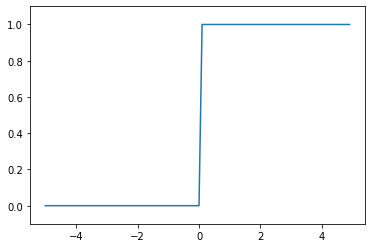

In [14]:
plt.plot(X, y)
plt.ylim(-0.1, 1.1)
plt.show()

## Implementing and Plotting the Sigmoid Function

In [15]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

# or sigmoid = lambda x: 1 / (1+np.exp(-x))

In [16]:
# The function defined above can also treat the vector
X = np.array([[0.002, -0.5], [4, 6], [-3, 10], [-120000, 10000000]], dtype=np.float64)

sigmoid(X)

"""
As we can see, if x goes closer to the positive infinity, then the sigmoid function returns 1,
while it returns 0 as x goes closer to the negative infinity.
Also, if x is close to zero, the sigmoid function returns a value close to 0.5
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


'\nAs we can see, if x goes closer to the positive infinity, then the sigmoid function returns 1,\nwhile it returns 0 as x goes closer to the negative infinity.\nAlso, if x is close to zero, the sigmoid function returns a value close to 0.5\n'

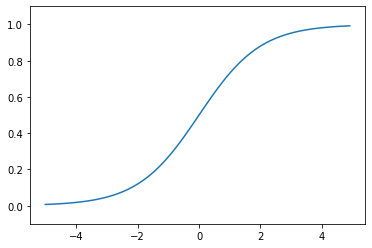

In [17]:
# plotting sigmoid function

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)

plt.plot(X, y)
plt.ylim(-0.1, 1.1)
plt.show()

<h3>Why do we need to use a "Non-linear" activation function?</h3>
<p style="font-size:13pt;line-height:19pt">
According to the textbook, it seems that an activation function transforms the input value and transmits the transformed one to another layer. Thus, the output layer receives the value of a composite function composed of the activation function of each layer. 
</p>
<p style="font-size:13pt;line-height:19pt">
However, composition of linear functions is always linear. For example, let $f(x)=ax+b$, then $$f(f(x))=a(ax+b)+b=a^2x+b(1+a)$$, which is linear as well. This implies that if a linear function is used as an activation function, the given neural network is equivalent to a single-layer network regardless of how many layers the given one has.
</p>
<p style="font-size:13pt;line-height:19pt">
Now, let's try to learn and implement another activation function. This function is called 'ReLU', which stands for "Rectified Linear Unit". Formula of this function looks like:
$$h(x)=
  \begin{cases} 
  x & x > 0 \\
  0 & x\leq 0 
  \end{cases}
$$
And this can also be expressed as: $$\max(x,0)$$
Now, let's implement the ReLU function with <code>Python</code>.
</p>

In [18]:
relu = lambda x: np.maximum(x, 0)

# works exactly the same as def relu(x): return np.maximum(x,0)

# warning: np.max(a, b) != np.maximum(a, b)
# np.max: returns the most largest one among the entire variables, column by column.
# np.maximum: returns larger number between two.

In [19]:
# put scalar into the relu function
print(relu(-2))
print(relu(10))

# put vector into the relu function
A = np.array([[1, 2], [-2, 10]], dtype=np.float64)
print(relu(A))

0
10
[[ 1.  2.]
 [ 0. 10.]]


# Multi-dimension Vector Computation

<p style="font-size:13pt;line-height:19pt">
In linear algebra, the word "dimension" refers to, informally, the minimum number of coordinates needed to specify any points within it. For example, a scalar corresponds to one point on the number line, thus only one coordinate, say $x$, is needed to specify the scalar, therefore a scalar is one-dimensional.<br>
Or, simply put, a dimension can be regarded as the cardinality of a vector, i.e. the number of elements in the vector. 
</p>
<p style="font-size:13pt;line-height:19pt">
Let's think about the coordinate plane. As you might know, the coordinate plane always consists of two axes: $x$ and $y$. Also, any points within the plane is expressed as a tuple, composed of one scalar from the $x$-axis and the other from the $y$-axis. Thus, we call that the coordinate plane has two dimensions.
</p>
<p style="font-size:13pt;line-height:19pt">
However, in <code>Numpy</code>, a dimension indicates the number of numbers explaining the shape of a vector. For example, let <code>A = np.array([[1, 2], [3, 4]])</code> be a numpy array. Mathematically, this array is equivalent to a matrix:
$$ A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} $$
And we call this matrix a $2 \times 2$ matrix composed of two rows and two columns. Also, this matrix is two-dimensional, since each (column) vector composing it is two-dimensional.<br>
Likewise, if you try to retrieve the shape of that Numpy array, the value <code>(2, 2)</code> will be returned.
</p>

In [20]:
A = np.array([[1, 2], [3, 4]], dtype=np.float64)
print(np.shape(A))
print(A.shape)

(2, 2)
(2, 2)


In [21]:
A

array([[1., 2.],
       [3., 4.]])

<p style="font-size:13pt;line-height:19pt">
Although we call the given array <code>A</code> to be two-dimensioanal as well, the reason is not the same as why we call the given matrix $A$ is two-dimensional.<br>
<strong>The array <code>A</code> is two-dimensional because the shape consists two numbers.</strong>
</p>
<p style="font-size:13pt;line-height:19pt">
Simply put, the dimension of a Numpy array can be understood as the number of brackets in the array, unit by unit. There is a small bracket surrounding two elements inside, and a big bracket surroungding two small brackets inside. Therefore, the given array has two dimensions.
</p>
<p style="font-size:13pt;line-height:19pt">
As a further example, let's think about a Numpy array <code>B = np.array([[[1, 2], [2, 1]], [[4, 5], [6, 7]]])</code>.<br>
What is the dimension of the array <code>B</code>? The answer is 3, since it is composed of three brackets. Specifically, each of the innermost bracket has two elements(numbers) inside, and each two of those innermost brackets are surrounded by a middle-size bracket. Finally, there is the outermost bracket around those two middle-size brackets.<br>
Furthermore, the exact shape of the array is (2, 2, 2).
</p>

In [22]:
B = np.array([[[1, 2], [2, 1]], [[4, 5], [6, 7]]], dtype=np.float64)
print(np.shape(B))

(2, 2, 2)


In [23]:
B

array([[[1., 2.],
        [2., 1.]],

       [[4., 5.],
        [6., 7.]]])

In [24]:
np.ndim(B)

3

## Matrix Multiplication

<p style="font-size:13pt;line-height:19pt">
The most important thing to be noticed for matrix multiplication is that the shape of two (or more) matrices should match each other.
</p>

In [25]:
def mat_mul(A, B):
  try:
    X = np.matmul(A, B)
    print(X)
    print("The shape of the result array is: {}".format(np.shape(X)))
  except Exception as e:
    print(e)

In [26]:
# does not return error, since the shape of arrays inside the outermost bracket of B matches that of A.
# and both the dimension and the shape of the result follows those of the array with bigger ones.

print("Shape of each matrix is : {0} and {1}".format(np.shape(A), np.shape(B)))
print(mat_mul(A, B)) # A is 2-dimensional, B is 3-dimenstional
print("================")
print(mat_mul(B, A))

Shape of each matrix is : (2, 2) and (2, 2, 2)
[[[ 5.  4.]
  [11. 10.]]

 [[16. 19.]
  [36. 43.]]]
The shape of the result array is: (2, 2, 2)
None
[[[ 7. 10.]
  [ 5.  8.]]

 [[19. 28.]
  [27. 40.]]]
The shape of the result array is: (2, 2, 2)
None


In [27]:
# does not return error either
C = np.array([[[-1, 0], [0, -1]]], dtype=np.float64)

print("Shape of each matrix is : {0} and {1}".format(np.shape(A), np.shape(C)))
print(mat_mul(A, C))
print("================")
print(mat_mul(C, A))

Shape of each matrix is : (2, 2) and (1, 2, 2)
[[[-1. -2.]
  [-3. -4.]]]
The shape of the result array is: (1, 2, 2)
None
[[[-1. -2.]
  [-3. -4.]]]
The shape of the result array is: (1, 2, 2)
None


In [28]:
# returns errors
D = np.array([[[-1], [0]], [[-1], [0]]], dtype=np.float64)

print("Shape of each matrix is : {0} and {1}".format(np.shape(A), np.shape(D)))
print(mat_mul(A, D))
print("================")
print(mat_mul(D, A)) # since (2, 1) cannot be multiplicated with (2, 2)

Shape of each matrix is : (2, 2) and (2, 2, 1)
[[[-1.]
  [-3.]]

 [[-1.]
  [-3.]]]
The shape of the result array is: (2, 2, 1)
None
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)
None


In [29]:
E = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
              [[9, 8, 7], [6, 5, 4], [3, 2, 1]],
              [[-1, 0, 1], [0, 2, 1], [-2, 3, 1]]], dtype=np.float64)
F = np.array([[[1, 0, 1],
               [0, 1, 0],
               [1, 1, 1]]], dtype=np.float64)

print("Shape of each matrix is : {0} and {1}".format(np.shape(E), np.shape(F)))
print(mat_mul(E, F))
print("================")
print(mat_mul(F, E)) # since (2, 1) cannot be multiplicated with (2, 2)

Shape of each matrix is : (3, 3, 3) and (1, 3, 3)
[[[ 4.  5.  4.]
  [10. 11. 10.]
  [16. 17. 16.]]

 [[16. 15. 16.]
  [10.  9. 10.]
  [ 4.  3.  4.]]

 [[ 0.  1.  0.]
  [ 1.  3.  1.]
  [-1.  4. -1.]]]
The shape of the result array is: (3, 3, 3)
None
[[[ 8. 10. 12.]
  [ 4.  5.  6.]
  [12. 15. 18.]]

 [[12. 10.  8.]
  [ 6.  5.  4.]
  [18. 15. 12.]]

 [[-3.  3.  2.]
  [ 0.  2.  1.]
  [-3.  5.  3.]]]
The shape of the result array is: (3, 3, 3)
None


In [30]:
# np.dot or matrix.dot works exactly the same as the np.matmul
import math

A = np.array([[math.pi, math.exp(1)], [-2, -5]], dtype=np.float64)
B = np.array([[np.sin(3), np.cos(-1)], [np.sqrt(3), 0.7]], dtype=np.float64)

X = np.matmul(A, B)
Y = np.dot(A, B)
Z = A.dot(B)
print(X)
print(Y)
print(Z)
print(X == Y)
print(Y == Z)
print(Z == X)

[[ 5.15154382  3.60020703]
 [-8.94249405 -4.58060461]]
[[ 5.15154382  3.60020703]
 [-8.94249405 -4.58060461]]
[[ 5.15154382  3.60020703]
 [-8.94249405 -4.58060461]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


### Implementation of neural network using matrix multiplication

In [31]:
X = np.array([1, 2])
print(np.shape(X))

W = np.array([[1, 3, 5],
              [2, 4, 6]], dtype=np.float64)
print(W)
print(np.shape(W))

Y = np.matmul(X, W)
print(Y)
print(Y.shape)

(2,)
[[1. 3. 5.]
 [2. 4. 6.]]
(2, 3)
[ 5. 11. 17.]
(3,)


# Implementation of Multi-layer neural network (Feedforward)

## Some notations

<p style="font-size:13pt;line-height:19pt">
<ol style="font-size:13pt;line-height:19pt">
<li>Input vector is denoted as $X$, and $x_i$ denotes the $i$-th element of the vector.</li>
<li>Intermediate vector, i.e. a vector of $j$-th hidden layer is denoted as $A^{(j)}$, and thus $a^{(j)}_i$ denotes the $i$-th element of the $j$-th layer.</li>
<li>Weight matrix of the $j$-th layer, which is multiplied by the input vector if $j=1$ and is multipled by the intermediate vector otherwise, is denoted as $W^{(j)}$.</li>
<ul style="font-size:11pt;line-height:19pt">
<li>Each weight in weight, is denoted as $w^{(j)}_{ik}$, where $j$ denotes the current layer, $i$ denotes the $i$-th element of the next layer, and $k$ denotes the $k$-th element of the current layer.</li>
</ul>
<li>$b^{(j)}_{i}$ denotes the $i$-th bias of the $j$-th layer.</li>
<li>Finally, the output vector is denoted as $Y$, and $y_i$ denotes the $i$-th element of the output layer.</li>
</ol>
</p>

## Feedforward propagation

<p style="font-size:13pt;line-height:19pt">
Each element of the hidden layer is calculated as the linear combination between the elements in the previous layer and the weight.
</p>
<p style="font-size:13pt;line-height:19pt">
For example, think about a 3-layer neural network, where input vector $X \in \mathbb{R}^{2} $ the 1<sup>st</sup> element of the first hidden layer, $a^{(1)}_{1}$ is calculated as:
$$ a^{(1)}_{1} = w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b_1^{(1)}$$
</p>
<p style="font-size:13pt;line-height:19pt">
The matrix expression would be like:
$$ \begin{pmatrix} a^{(1)}_{1} \\ a^{(1)}_{2} \end{pmatrix} = \begin{pmatrix} w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b_1^{(1)} \\ w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + b_2^{(1)} \end{pmatrix} $$
which is equivalent to:
$$ \begin{pmatrix} a^{(1)}_{1} \\ a^{(1)}_{2} \end{pmatrix} = \begin{pmatrix} x_1 & x_2 \end{pmatrix} \begin{pmatrix} w^{(1)}_{11} & w^{(1)}_{21} \\ w^{(1)}_{12} & w^{(1)}_{22} \end{pmatrix}  + \begin{pmatrix} b_1^{(1)} \\ b_2^{(1)} \end{pmatrix} $$
Thus,
$$ A^{(1)} = X^{T}W^{(1)} + b^{(1)}$$
Note: The number of rows of the weight matrix denotes the number of nodes in the current layer, and the number of columns denots the number of nodes in the next layer.
</p>
<p style="font-size:13pt;line-height:19pt">
Implementation is like below.
</p>

In [32]:
X = np.array([1, 0.5], dtype=np.float64)
W1 = np.array([[0.1, 0.3, 0.5],
              [0.2, 0.4, 0.6]], dtype=np.float64)
B1 = np.array([0.1, 0.2, 0.3], dtype=np.float64)

print(np.shape(X), np.shape(W1), np.shape(B1))

(2,) (2, 3) (3,)


In [33]:
A1 = np.matmul(X, W1) + B1
print(np.shape(A1))
A1

(3,)


array([0.3, 0.7, 1.1])

In [34]:
A1_t = np.matmul(np.transpose(W1), X) + B1
print(np.shape(A1_t))
A1_t

(3,)


array([0.3, 0.7, 1.1])

<p style="font-size:13pt;line-height:19pt">
Also, an activation is applied on transmission from each layer to another.
</p>

In [35]:
# if an activation is a sigmoid function
Z1_sig = sigmoid(A1)

# if an activation is a ReLU function
Z1_relu = relu(A1)

print(Z1_sig)
print(Z1_relu)

[0.57444252 0.66818777 0.75026011]
[0.3 0.7 1.1]


In [36]:
# 2nd layer
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]], dtype=np.float64) # 3 by 2 matrix, since 3 elements in the 1st layer and 2 elements in 2nd.
B2 = np.array([0.1, 0.2], dtype=np.float64)

A2_sig = np.dot(Z1_sig, W2) + B2
A2_relu = np.dot(Z1_relu, W2) + B2

print(A2_sig)
print(A2_relu)

Z2_sig = sigmoid(A2_sig)
Z2_relu = relu(A2_relu)
print(Z2_sig)
print(Z2_relu)

Z2_sr = sigmoid(A2_relu)
Z2_rs = relu(A2_sig)
print(Z2_sr)
print(Z2_rs)

[0.51615984 1.21402696]
[0.6  1.33]
[0.62624937 0.7710107 ]
[0.6  1.33]
[0.64565631 0.79084063]
[0.51615984 1.21402696]


In [37]:
# 3rd layer to output
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]], dtype=np.float64) # 2 by 2 matrix, since 2 elements in the 2nd layer and 2 elements in the output layer.
B3 = np.array([0.1, 0.2], dtype=np.float64)

A3_sr = np.dot(Z2_sr, W3) + B3
A3_rs = np.dot(Z2_rs, W3) + B3

print(A3_sr)
print(A3_rs)

# just return the same value as the output
def identity(X): return X

y_sr = identity(A3_sr)
y_rs = identity(A3_rs)

print(y_sr)
print(y_rs)

[0.32273376 0.71003315]
[0.39442138 0.84045873]
[0.32273376 0.71003315]
[0.39442138 0.84045873]


In [38]:
# Aggregation
def init_network():
  network = dict()
  network['W1'] = np.array([[0.1, 0.3, 0.5], 
                            [0.2, 0.4, 0.6]], dtype=np.float64)
  network['b1'] = np.array([0.1, 0.2, 0.3], dtype=np.float64)
  network['W2'] = np.array([[0.1, 0.4],
                            [0.2, 0.5],
                            [0.3, 0.6]], dtype=np.float64)
  network['b2'] = np.array([0.1, 0.2], dtype=np.float64)
  network['W3'] = np.array([[0.1, 0.3],
                            [0.2, 0.4]], dtype=np.float64)
  network['b3'] = np.array([0.1, 0.2], dtype=np.float64)

  return network

def forward(X, network):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.matmul(X, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.matmul(z1, W2) + b2
  z2 = relu(a2)
  a3 = np.matmul(z2, W3) + b3
  y = identity(a3)

  return y

network = init_network()
X = np.array([1, 0.5])
y = forward(X, network)
y

array([0.39442138, 0.84045873])

# Output layer

<p style="font-size:13pt;line-height:19pt">
Although we used the identity function as an activation function from the final hidden layer to the output layer, which activation function to use depends on the purpose of learning: regression or classification.
</p>
<p style="font-size:13pt;line-height:19pt">
Generally, for regression, the identity function is used, while the Softmax function is used for classification.
</p>
<p style="font-size:13pt;line-height:19pt">
The identity function is very simple: $y_k=a_k$, and the Softmax function also has a somewhat simple form:
$$ y_k=\frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)}$$
This functional form implies that every node of the final hidden layer is used - as a denominator - to compute the $k$-th node of the output layer, while for the identity function, each node of the final hidden layer equals to the corresponding node of the output layer.
</p>
<p style="font-size:13pt;line-height:19pt">
However, the exponential function value increases much more rapidly than an input value increases, implying that it can cause 'stack overflow'. To prevent this problem, the Softmax function is transformed like below.
$$ \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)}=\frac{C\exp(a_k)}{C\sum_{i=1}^{n}\exp(a_i)} \\ 
= \frac{\exp(\log C)\exp(a_k)}{\exp(\log C)\sum_{i=1}^{n}\exp(a_i)} \\
= \frac{\exp(a_k+\log C)}{\sum_{i=1}^{n}\exp(a_i + \log C)} \\ $$
Where $ C'=\log C $ is constant. This implies that even if we add a constant to the formula, the result is not influenced. Therefore, to address the stack overflow problem, the maximum element of a given vector is subtracted from each element. This can be implemented as below. 
</p>

In [39]:
def softmax(X):
  # X: np.array equivalent to a vector
  c = np.max(X)
  exp_X = np.exp(X - c)
  sum_exp = np.sum(exp_X)
  y = exp_X / sum_exp

  return y

In [40]:
a = np.array([1010, 1000, 990],dtype=np.float64)

softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## Interpretation of Softmax function

<p style="font-size:13pt;line-height:19pt">
The output vector returned from the softmax function has several features.
<ol style="font-size:13pt;line-height:19pt">
<li>Sum of all elements is always equal to 1. This implies that the $i$-th element represents the probability such that the given input belongs to the $i$-th class.</li>
<li>As $\exp(x)$ is an increasing function, the order relation between variables remains the same.</li>
<li>Typically, the Softmax function is only used for training, not testing or inference.</li>
</ol>
</p>

## How to determine the number of output nodes

<p style="font-size:13pt;line-height:19pt">
The number of the output nodes depends on what kind of problem you want to solve.
<ul style="font-size:13pt;line-height:19pt">
<li>For classification, the number of output nodes is equal to that of the classes.</li>
<li>While for regression, there is no rules (or even rules of thumb) to determine the number of output nodes.</li>
</ul>
</p>

# Example - Mnist Handwritten Digit Recognition

## 1. Data Import

In [44]:
# import dataset from scikit-learn
from sklearn.datasets import fetch_openml

In [45]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [46]:
x, y = mnist['data'], mnist['target']

# split the data into the training set and the test set
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [47]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## 2. EDA - load image

### 2-1. Using PIL

In [48]:
from PIL import Image

In [54]:
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

In [50]:
img = x_train[0]
label = y_train[0]
print(label)

5


In [51]:
print(np.shape(img))

(784,)


In [52]:
img = np.reshape(img, (28, 28))
np.shape(img)

(28, 28)

In [55]:
img_show(img)

### 2-2. MatPlotLib

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

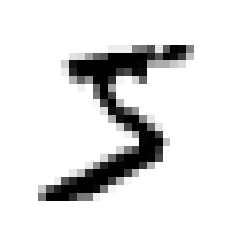

In [58]:
plt.imshow(img, cmap='binary')
plt.axis('off')
plt.show()

## 3. Building a Neural Network

<p style="font-size:13pt;line-height:19pt">
We are going to re-use the functions we defined above for prediction.
</p>

In [85]:
import pickle
from datetime import datetime

In [65]:
def init_network():
  with open('/content/drive/MyDrive/밑딥/deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)
  
  return network

In [66]:
def predict(X, network):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.matmul(X, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.matmul(z1, W2) + b2
  z2 = relu(a2) # used ReLU instead of the Sigmoid
  a3 = np.matmul(z2, W3) + b3
  y = softmax(a3)

  return y

In [86]:
network = init_network()

start = datetime.now()

accuracy_cnt = 0 # Metric for model evaluation
for i in range(len(x_train)):
  if i % 10000 == 0:
    print(i)
  y = predict(x_train[i], network) # returns 10 values, each representing the probability of the given input belonging to the class
  p = np.argmax(y) # returns the argument such that has the maximum value among y
  if np.float(p) == np.float(y_train[i]): # if the argmax equals to the true value
    accuracy_cnt += 1

end = datetime.now()

print("training_time: {}".format(end - start))

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


10000
20000
30000
40000
50000
training_time: 0:00:11.249923


In [87]:
# print(accuracy_cnt)
accuracy = str(float(accuracy_cnt) / len(x_train))
print('Accuracy: {}'.format(accuracy))

54329
Accuracy: 0.9054833333333333


## 4. Batch Training

<p style="font-size:13pt;line-height:19pt">
The word 'Batch' means "a group that is dealt with at the same time." From the perspective of data analysis, batch can be viewed as 'a small set of training set that are trained at the same time.'
</p>
<p style="font-size:13pt;line-height:19pt">
The batch training has a very strong advantage: it reduces the training time. Since a computer is optimized to compute a big and sparse dataset efficiently, batch training takes much less time than training one element by one element.
</p>
<p style="font-size:13pt;line-height:19pt">
Let $n$ be the batch size and $k$ be the number of classes. If we train the dataset one by one, the shape of the output is ($k$,), which is a $k$-dimensional vector. However, if we train the dataset by batch, the shape of output is ($n$,$k$), which is a $n\times k$ matrix. 
</p>

In [91]:
# implementation of batch training
network = init_network()
batch_size = 200

start = datetime.now()

accuracy_cnt = 0 # Metric for model evaluation
for i in range(0, len(x_train), batch_size): # increment i by the amount of batch_size
  if i % 10000 == 0:
    print(i)
  x_batch = x_train[i:i+batch_size]
  y_batch = predict(x_batch, network) # returns a 100*10 matrix
  p = np.argmax(y_batch, axis=1) # returns a vector, containing the maximum value of each column
  
  p = np.array(p, dtype=np.float64)
  truevals = np.array(y_train[i:i+batch_size], dtype=np.float64)

  accuracy_cnt += np.sum(p == truevals) # returns how many predicted values are equal to the corresponding true values

end = datetime.now()

print("training_time: {}".format(end - start))

0
10000
20000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


30000
40000
50000
training_time: 0:00:00.489295


In [92]:
# print(accuracy_cnt)
accuracy = str(float(accuracy_cnt) / len(x_train))
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9054833333333333
